# Selected Policies

This notebook is used to show the selected policies per problem formulation.

In [1]:
import pandas as pd
import os
from model.enumerations import ProblemFormulation
from dmdu.general.xlm_constants_epsilons import get_lever_names
from dmdu.general.visualization import plot_conference_pathways
from dmdu.general.visualization import plot_optimal_policies
from dmdu.general.visualization import plot_optimal_policies_dict

# Load results per problem formulation

In [2]:
lever_names = get_lever_names()

problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED
]


In [3]:
problem_formulations_dict = {}
for problem_formulation in problem_formulations:
    target_directory = os.path.join(
        os.path.dirname(os.getcwd()),
        'paretosorting',
        'data',
        'final',
        f'sorted_{problem_formulation.name}.csv'
    )

    # Load policies
    policies_df = pd.read_csv(target_directory)
    policies_df = policies_df.loc[:, lever_names]
    problem_formulations_dict[problem_formulation.name] = policies_df

UTILITARIAN_AGGREGATED


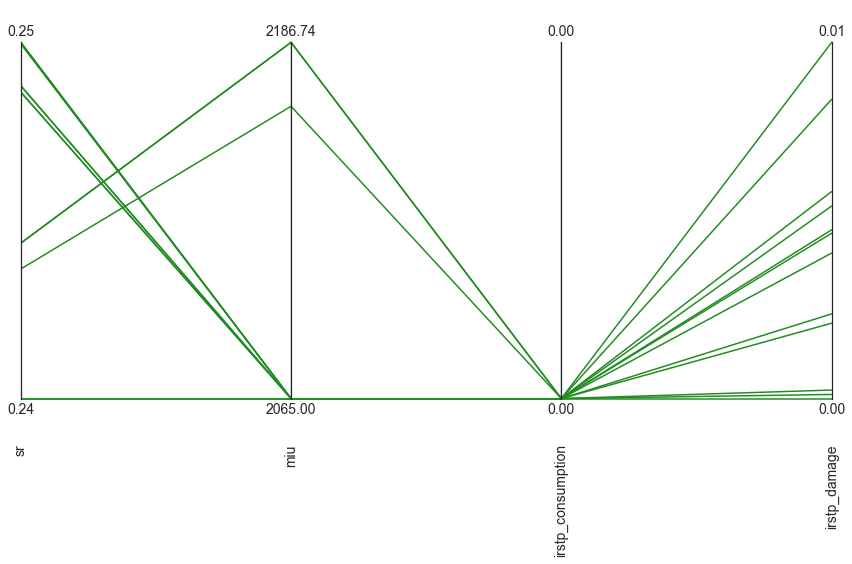

UTILITARIAN_DISAGGREGATED


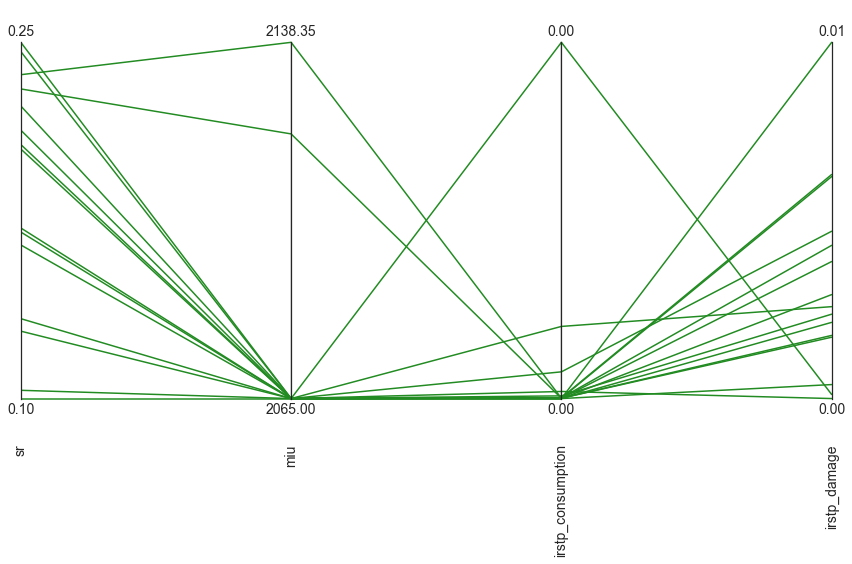

SUFFICIENTARIAN_AGGREGATED


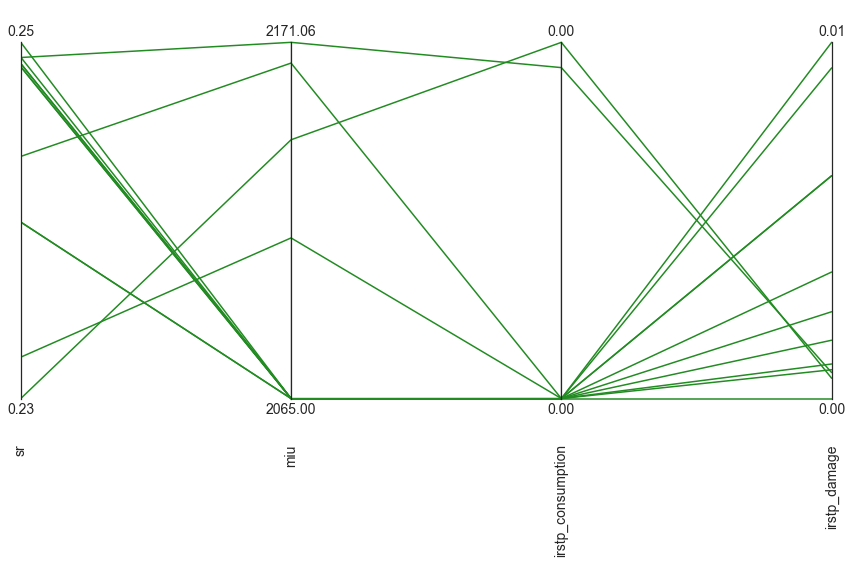

SUFFICIENTARIAN_DISAGGREGATED


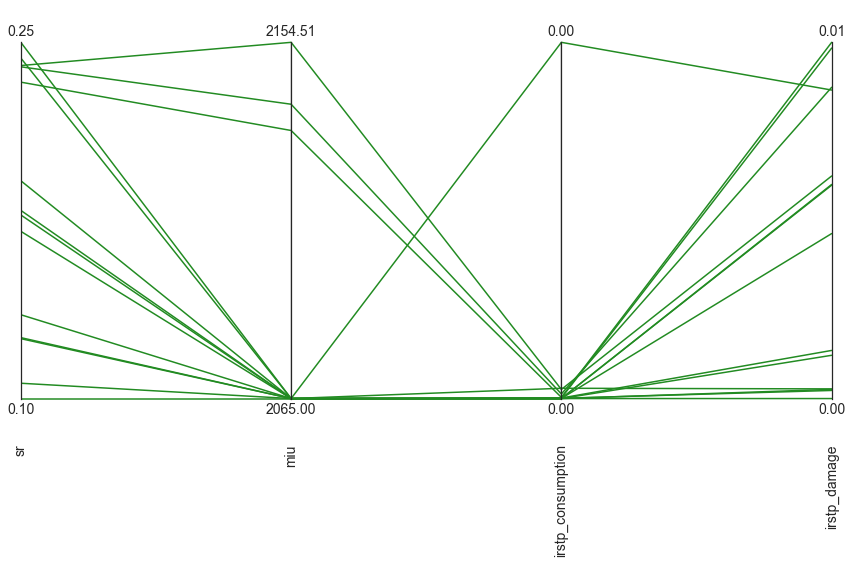

In [9]:
for problem_formulation, policies_df in problem_formulations_dict.items():
    print(problem_formulation)
    plot_optimal_policies(
        policies=policies_df,
        saving=True,
        file_name=f'optimal_policies_levers_parallel_axis_plot_{problem_formulation}'
    )


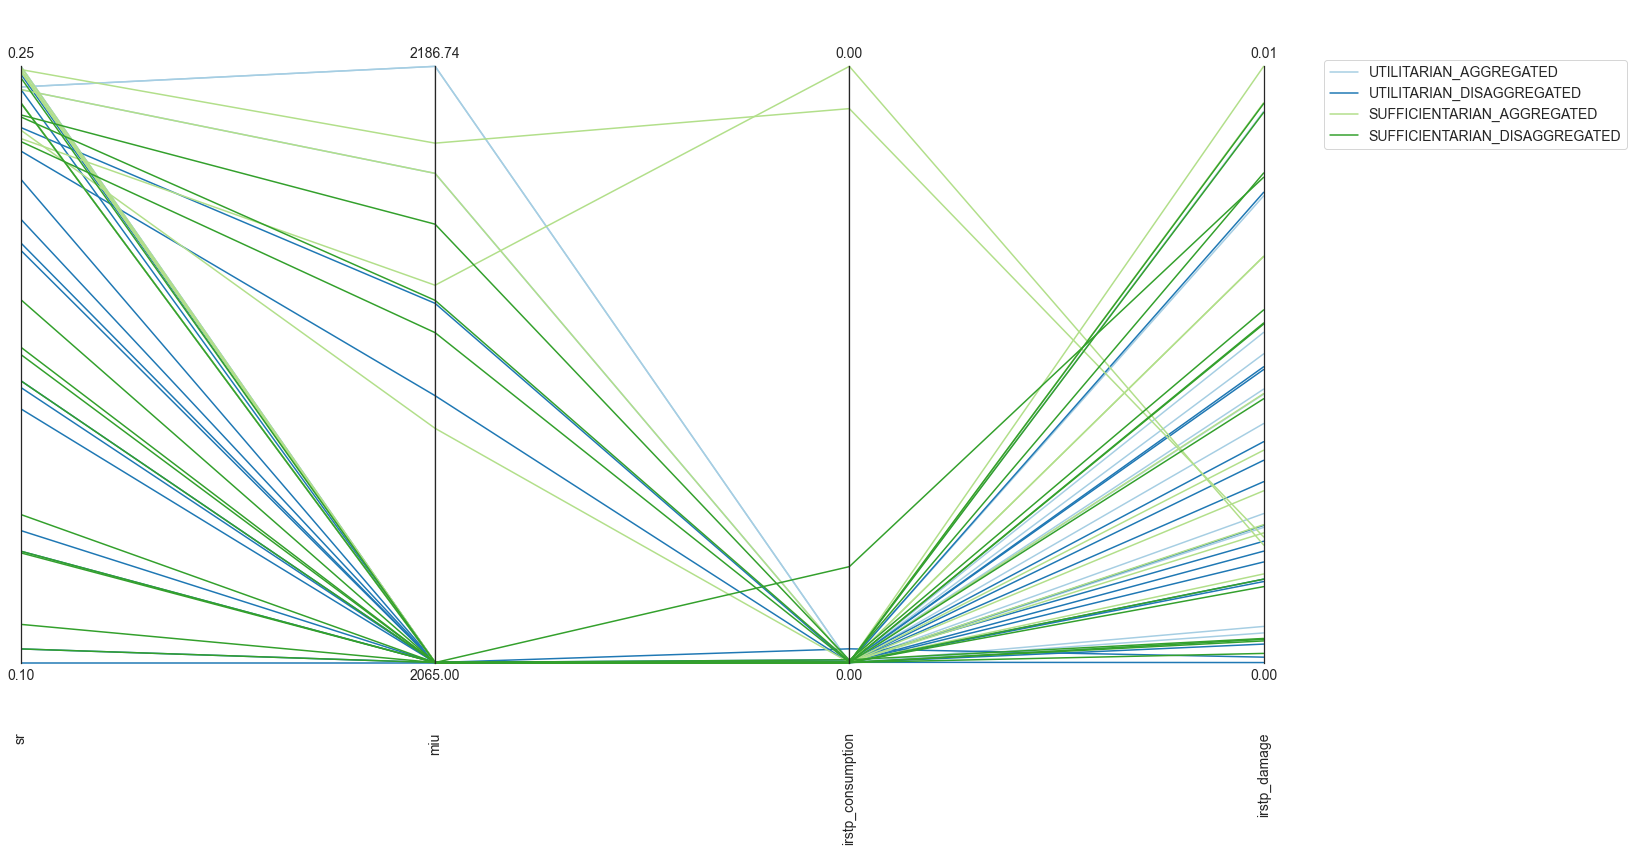

In [8]:
plot_optimal_policies_dict(
    policies_dict=problem_formulations_dict,
    saving=True,
    file_name='optimal_policies_levers_parallel_axis_plot'
)

## Pathways

In [6]:
# problem_formulations_dict = {}
#
# for problem_formulation in problem_formulations:
#     target_directory = os.path.join(
#         os.path.dirname(os.getcwd()),
#         'data',
#         'experimentsextensive',
#         f'results_{problem_formulation.name}'
#     )
#     experiments, outcomes = load_results(target_directory)
#     outcomes = pd.DataFrame(outcomes)
#     problem_formulations_dict[problem_formulation.name] = experiments, outcomes

In [7]:
# from dmdu.general.visualization import plot_kpi_pathways
#
# plot_kpi_pathways(
#     problem_formulations_dict=problem_formulations_dict,
#     outcome_names=None,
#     saving=False,
#     file_name=None
# )